In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df =pd.read_csv('/content/lending_club_loan_two.csv')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [0]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [0]:
df['loan_repaid']=df['loan_status'].map({'Fully Paid':int(1),'Charged Off' :int(0)})

In [0]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


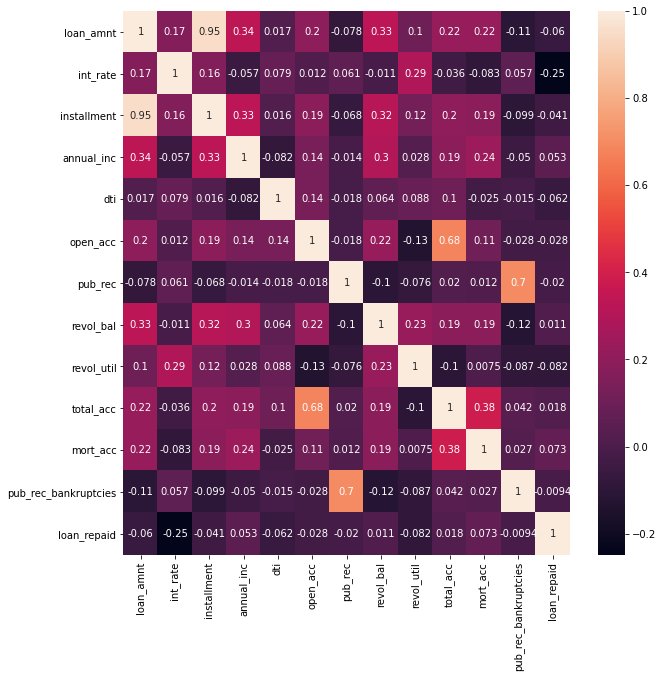

In [0]:
plt.figure(figsize=(10,10))

sns.heatmap(df.corr(),annot=True)

In [0]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [0]:
df['loan_repaid']=df['loan_status'].map({'Fully Paid':1,'Charged Off' :0})

In [0]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


In [0]:
df = df.drop('emp_title',axis=1)

In [0]:
df = df.drop('emp_length',axis=1)

In [0]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [0]:
df = df.drop('title',axis=1)

In [0]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [0]:
df.corr()['mort_acc']

loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
Name: mort_acc, dtype: float64

In [0]:
acc_avg=df.groupby('total_acc').mean()['mort_acc']

In [0]:
def fill(total_acc,mort_acc):
  if np.isnan(mort_acc):
    return acc_avg[total_acc]
  else:
    return mort_acc

In [0]:
df['mort_acc']=df.apply(lambda x : fill(x['total_acc'],x['mort_acc']),axis=1)

In [0]:
df.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [0]:
df = df.dropna()

In [0]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [0]:
df.select_dtypes(include='object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [0]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [0]:
df['term']=df['term'].apply(lambda x : int(x[:3]))

In [0]:
df['term'].head()

0    36
1    36
2    36
3    36
4    60
Name: term, dtype: int64

In [0]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [0]:
df = df.drop('grade',axis=1)

In [0]:
df.select_dtypes(include='object').columns

Index(['sub_grade', 'home_ownership', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [0]:
df['sub_grade'].value_counts()

B3    26611
B4    25558
C1    23609
C2    22541
B2    22457
B5    22046
C3    21178
C4    20232
B1    19140
A5    18500
C5    18215
D1    15947
A4    15763
D2    13916
D3    12196
D4    11625
A3    10537
A1     9717
D5     9680
A2     9539
E1     7906
E2     7410
E3     6196
E4     5354
E5     4561
F1     3530
F2     2756
F3     2277
F4     1782
F5     1395
G1     1057
G2      752
G3      552
G4      371
G5      313
Name: sub_grade, dtype: int64

In [0]:
df['term'].head()

0    36
1    36
2    36
3    36
4    60
Name: term, dtype: int64

In [0]:
df['sub_grade']=encoder.fit_transform(df['sub_grade'])

In [0]:
df['sub_grade'].value_counts()

7     26611
8     25558
10    23609
11    22541
6     22457
9     22046
12    21178
13    20232
5     19140
4     18500
14    18215
15    15947
3     15763
16    13916
17    12196
18    11625
2     10537
0      9717
19     9680
1      9539
20     7906
21     7410
22     6196
23     5354
24     4561
25     3530
26     2756
27     2277
28     1782
29     1395
30     1057
31      752
32      552
33      371
34      313
Name: sub_grade, dtype: int64

In [0]:
df['verification_status'].value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [0]:
df['verification_status'] = encoder.fit_transform(df['verification_status'])

In [0]:
df['verification_status'].value_counts()

2    139451
1    131301
0    124467
Name: verification_status, dtype: int64

In [0]:
df['application_type'].value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [0]:
df['application_type'] = encoder.fit_transform(df['application_type'])

In [0]:
df['application_type'].value_counts()

1    394508
2       425
0       286
Name: application_type, dtype: int64

In [0]:
df['initial_list_status'].value_counts()

f    237346
w    157873
Name: initial_list_status, dtype: int64

In [0]:
df['initial_list_status'] = encoder.fit_transform(df['initial_list_status'])

In [0]:
df['initial_list_status'].value_counts()

0    237346
1    157873
Name: initial_list_status, dtype: int64

In [0]:
df['purpose'].value_counts()

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

In [0]:
df['purpose'] = encoder.fit_transform(df['purpose'])

In [0]:
df['purpose'].value_counts()

2     234169
1      82923
4      23961
9      21059
6       8756
11      5656
0       4670
7       4175
8       2842
12      2442
5       2197
13      1794
10       329
3        246
Name: purpose, dtype: int64

In [0]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

In [0]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [0]:
df['home_ownership']=df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [0]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [0]:
df['loan_status'] = encoder.fit_transform(df['loan_status'] )

In [0]:
df['loan_repaid'].value_counts()

1    317696
0     77523
Name: loan_repaid, dtype: int64

In [0]:
df['loan_status'].value_counts()

1    317696
0     77523
Name: loan_status, dtype: int64

In [0]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36,11.44,329.48,8,RENT,117000.0,0,Jan-2015,1,12,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,1,1,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36,11.99,265.68,9,MORTGAGE,65000.0,0,Jan-2015,1,2,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,0,1,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36,10.49,506.97,7,RENT,43057.0,1,Jan-2015,1,1,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,0,1,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36,6.49,220.65,1,RENT,54000.0,0,Nov-2014,1,1,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,0,1,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60,17.27,609.33,14,MORTGAGE,55000.0,2,Apr-2013,0,1,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,0,1,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


In [0]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [0]:
df['home_ownership'] = encoder.fit_transform(df['home_ownership'])

In [0]:
df['home_ownership'].value_counts()

0    198022
3    159395
2     37660
1       142
Name: home_ownership, dtype: int64

In [0]:
df['zip'] = df['address'].apply(lambda x: x[-5:])

In [0]:
df['zip'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip, dtype: int64

In [0]:
df = df.drop('address',axis=1)

In [0]:
df['zip'] = encoder.fit_transform(df['zip'])

In [0]:
df['zip'].value_counts()

7    56880
3    56413
5    56402
6    55811
0    45725
4    45393
1    45300
2    11210
9    11126
8    10959
Name: zip, dtype: int64

In [0]:
df = df.drop('issue_d',axis=1)

In [0]:
df['earliest_cr_line'].value_counts()

Oct-2000    3013
Aug-2000    2930
Oct-2001    2890
Aug-2001    2879
Nov-2000    2729
            ... 
Aug-1960       1
Feb-1957       1
Sep-1957       1
Feb-1961       1
Jul-1960       1
Name: earliest_cr_line, Length: 684, dtype: int64

In [0]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x : int(x[-4:]))

In [0]:
df['earliest_cr_line'].value_counts()

2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1948        1
1944        1
Name: earliest_cr_line, Length: 65, dtype: int64

In [0]:
df['earliest_cr_line'].nunique()

65

In [0]:
df['earliest_cr_line'].value_counts()

2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1948        1
1944        1
Name: earliest_cr_line, Length: 65, dtype: int64

In [0]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid',
       'zip'],
      dtype='object')

In [0]:
df = df.drop('loan_status',axis=1)

In [0]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'zip'],
      dtype='object')

In [0]:
df['pub_rec_bankruptcies'].value_counts()

0.0    350108
1.0     42786
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

In [0]:
df['loan_amnt']

0         10000.0
1          8000.0
2         15600.0
3          7200.0
4         24375.0
           ...   
396025    10000.0
396026    21000.0
396027     5000.0
396028    21000.0
396029     2000.0
Name: loan_amnt, Length: 395219, dtype: float64

In [0]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

In [0]:
df['int_rate']

0         11.44
1         11.99
2         10.49
3          6.49
4         17.27
          ...  
396025    10.99
396026    12.29
396027     9.99
396028    15.31
396029    13.61
Name: int_rate, Length: 395219, dtype: float64

In [0]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'zip'],
      dtype='object')

In [0]:
df['initial_list_status'].value_counts()

0    237346
1    157873
Name: initial_list_status, dtype: int64

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [0]:
from sklearn.model_selection import train_test_split


In [0]:
X = df.drop('loan_repaid',axis=1).values

In [0]:
X.shape

(395219, 21)

In [0]:
y=df['loan_repaid'].values

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [0]:
X_train = scaler.fit_transform(X_train)

In [0]:
X_test = scaler.transform(X_test)

In [0]:
model = Sequential()
model.add(Dense(21, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer='adam')


In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop=EarlyStopping(monitor='val_loss',mode = 'min',verbose=1,patience=11)

In [0]:

model.fit(x=X_train,y=y_train,epochs = 55,
          validation_data=(X_test,y_test),
          batch_size=128,
          callbacks=[early_stop])

Epoch 1/55
2471/2471 [==============================] - 5s 2ms/step - loss: 0.4651 - val_loss: 0.3542
Epoch 2/55
2471/2471 [==============================] - 5s 2ms/step - loss: 0.3717 - val_loss: 0.3327
Epoch 3/55
2471/2471 [==============================] - 6s 2ms/step - loss: 0.3520 - val_loss: 0.3127
Epoch 4/55
2471/2471 [==============================] - 6s 2ms/step - loss: 0.3408 - val_loss: 0.3000
Epoch 5/55
2471/2471 [==============================] - 5s 2ms/step - loss: 0.3309 - val_loss: 0.2927
Epoch 6/55
2471/2471 [==============================] - 5s 2ms/step - loss: 0.3275 - val_loss: 0.2900
Epoch 7/55
2471/2471 [==============================] - 5s 2ms/step - loss: 0.3244 - val_loss: 0.2872
Epoch 8/55
2471/2471 [==============================] - 5s 2ms/step - loss: 0.3229 - val_loss: 0.2892
Epoch 9/55
2471/2471 [==============================] - 5s 2ms/step - loss: 0.3206 - val_loss: 0.2931
Epoch 10/55
2471/2471 [==============================] - 5s 2ms/step - loss: 0.320

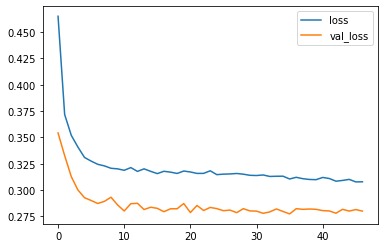

In [0]:
loss1 = pd.DataFrame(model.history.history)
loss1.plot()

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
predictions = model.predict_classes(X_test)

In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15421
           1       0.88      1.00      0.93     63623

    accuracy                           0.89     79044
   macro avg       0.94      0.71      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [0]:
model = Sequential()
model.add(Dense(21, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer='adam')

In [0]:

model.fit(x=X_train,y=y_train,epochs = 55,
          validation_data=(X_test,y_test),
          batch_size=256,
          callbacks=[early_stop])

Epoch 1/55
1236/1236 [==============================] - 3s 2ms/step - loss: 0.4488 - val_loss: 0.3933
Epoch 2/55
1236/1236 [==============================] - 3s 2ms/step - loss: 0.3922 - val_loss: 0.3619
Epoch 3/55
1236/1236 [==============================] - 3s 2ms/step - loss: 0.3688 - val_loss: 0.3395
Epoch 4/55
1236/1236 [==============================] - 3s 2ms/step - loss: 0.3467 - val_loss: 0.3285
Epoch 5/55
1236/1236 [==============================] - 3s 2ms/step - loss: 0.3399 - val_loss: 0.3265
Epoch 6/55
1236/1236 [==============================] - 3s 2ms/step - loss: 0.3374 - val_loss: 0.3240
Epoch 7/55
1236/1236 [==============================] - 3s 2ms/step - loss: 0.3335 - val_loss: 0.3250
Epoch 8/55
1236/1236 [==============================] - 3s 2ms/step - loss: 0.3308 - val_loss: 0.3190
Epoch 9/55
1236/1236 [==============================] - 3s 2ms/step - loss: 0.3271 - val_loss: 0.3114
Epoch 10/55
1236/1236 [==============================] - 3s 2ms/step - loss: 0.322

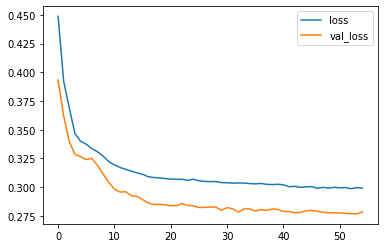

In [0]:
loss1 = pd.DataFrame(model.history.history)
loss1.plot()

In [0]:
predictions = model.predict_classes(X_test)


In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15421
           1       0.88      1.00      0.94     63623

    accuracy                           0.89     79044
   macro avg       0.94      0.71      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [0]:
confusion_matrix(y_test,predictions)

array([[ 6616,  8805],
       [    2, 63621]])

In [0]:
model = Sequential()
model.add(Dense(21, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer='adam')

In [0]:

model.fit(x=X_train,y=y_train,epochs = 55,
          validation_data=(X_test,y_test),
          batch_size=256,
          callbacks=[early_stop])

Epoch 1/55
1236/1236 [==============================] - 3s 3ms/step - loss: 0.4681 - val_loss: 0.4064
Epoch 2/55
1236/1236 [==============================] - 3s 3ms/step - loss: 0.3921 - val_loss: 0.3338
Epoch 3/55
1236/1236 [==============================] - 3s 3ms/step - loss: 0.3620 - val_loss: 0.3277
Epoch 4/55
1236/1236 [==============================] - 3s 3ms/step - loss: 0.3577 - val_loss: 0.3286
Epoch 5/55
1236/1236 [==============================] - 3s 2ms/step - loss: 0.3544 - val_loss: 0.3244
Epoch 6/55
1236/1236 [==============================] - 3s 3ms/step - loss: 0.3506 - val_loss: 0.3166
Epoch 7/55
1236/1236 [==============================] - 3s 3ms/step - loss: 0.3464 - val_loss: 0.3109
Epoch 8/55
1236/1236 [==============================] - 3s 2ms/step - loss: 0.3407 - val_loss: 0.3062
Epoch 9/55
1236/1236 [==============================] - 3s 2ms/step - loss: 0.3359 - val_loss: 0.2947
Epoch 10/55
1236/1236 [==============================] - 3s 2ms/step - loss: 0.331

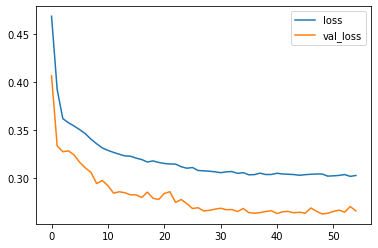

In [0]:
loss1 = pd.DataFrame(model.history.history)
loss1.plot()

In [0]:
predictions = model.predict_classes(X_test)

In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15421
           1       0.88      1.00      0.94     63623

    accuracy                           0.89     79044
   macro avg       0.94      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [0]:
X_train.shape

(316175, 21)

In [0]:
model = Sequential()
model.add(Dense(21, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer='adam')

In [0]:

model.fit(x=X_train,y=y_train,epochs = 55,
          validation_data=(X_test,y_test),
          batch_size=128,
          callbacks=[early_stop])

Epoch 1/55
2471/2471 [==============================] - 6s 2ms/step - loss: 0.4513 - val_loss: 0.3635
Epoch 2/55
2471/2471 [==============================] - 6s 2ms/step - loss: 0.3611 - val_loss: 0.2881
Epoch 3/55
2471/2471 [==============================] - 10s 4ms/step - loss: 0.3174 - val_loss: 0.2808
Epoch 4/55
2471/2471 [==============================] - 6s 2ms/step - loss: 0.3075 - val_loss: 0.2773
Epoch 5/55
2471/2471 [==============================] - 6s 2ms/step - loss: 0.3005 - val_loss: 0.2717
Epoch 6/55
2471/2471 [==============================] - 6s 2ms/step - loss: 0.2966 - val_loss: 0.2718
Epoch 7/55
2471/2471 [==============================] - 6s 2ms/step - loss: 0.2947 - val_loss: 0.2772
Epoch 8/55
2471/2471 [==============================] - 6s 2ms/step - loss: 0.2941 - val_loss: 0.2702
Epoch 9/55
2471/2471 [==============================] - 6s 2ms/step - loss: 0.2906 - val_loss: 0.2683
Epoch 10/55
2471/2471 [==============================] - 6s 2ms/step - loss: 0.29

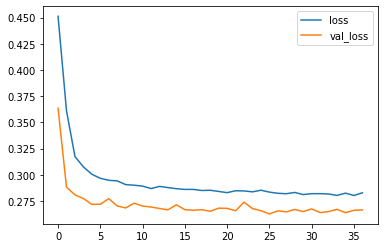

In [0]:
loss1 = pd.DataFrame(model.history.history)
loss1.plot()

In [0]:
predictions = model.predict_classes(X_test)

In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15421
           1       0.88      1.00      0.94     63623

    accuracy                           0.89     79044
   macro avg       0.94      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [0]:
confusion_matrix(y_test,predictions)

array([[ 6639,  8782],
       [    1, 63622]])

In [0]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt               25000.00
term                       60.00
int_rate                   18.24
installment               638.11
sub_grade                  19.00
home_ownership              3.00
annual_inc              61665.00
verification_status         2.00
purpose                     2.00
dti                        30.11
earliest_cr_line         1996.00
open_acc                   16.00
pub_rec                     0.00
revol_bal               27778.00
revol_util                 65.50
total_acc                  46.00
initial_list_status         0.00
application_type            1.00
mort_acc                    0.00
pub_rec_bankruptcies        0.00
zip                         5.00
Name: 305323, dtype: float64

In [0]:
model.predict_classes(new_customer.values.reshape(1,21))

array([[1]], dtype=int32)

In [0]:
df.iloc[random_ind]['loan_repaid']

1.0